In [1]:
import tensorflow 

import pandas as pd
import numpy as np
import os
import keras
import random
import cv2
import math
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense,GlobalAveragePooling2D,Convolution2D,BatchNormalization
from tensorflow.keras.layers import Flatten,MaxPooling2D,Dropout

from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.densenet import preprocess_input

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array

from tensorflow.keras.models import Model

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

import warnings
warnings.filterwarnings("ignore")

In [2]:
print("Tensorflow-version:", tensorflow.__version__)

Tensorflow-version: 2.16.1


In [3]:
model_d=DenseNet121(weights='imagenet',include_top=False, input_shape=(256, 256, 3)) 

x=model_d.output

x= GlobalAveragePooling2D()(x)
x= BatchNormalization()(x)
x= Dropout(0.5)(x)
x= Dense(1024,activation='relu')(x) 
x= Dense(512,activation='relu')(x) 
x= BatchNormalization()(x)
x= Dropout(0.5)(x)

preds=Dense(4,activation='softmax')(x) #FC-layer

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 44s 1us/step


In [4]:
model=Model(inputs=model_d.input,outputs=preds)
#model.summary()

In [5]:
for layer in model.layers[:-8]:
    layer.trainable=False
    
for layer in model.layers[-8:]:
    layer.trainable=True

In [6]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
#model.summary()

In [9]:
trdata = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

tsdata = ImageDataGenerator(rescale = 1./255)
traindata = trdata.flow_from_directory(directory="C:/Users/Jamal/Downloads/Compressed/data/train",target_size=(256,256),batch_size = 32,
                                                 class_mode = 'categorical')
testdata = tsdata.flow_from_directory(directory="C:/Users/Jamal/Downloads/Compressed/data/test", target_size=(256,256),batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.
Found 18 images belonging to 4 classes.


In [14]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
# checkpoint = ModelCheckpoint("densenet.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto')
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')

history = model.fit( traindata,validation_data=testdata,epochs=20)

Epoch 1/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 575s 8s/step - accuracy: 0.6954 - loss: 0.9315 - val_accuracy: 0.7222 - val_loss: 0.6056
Epoch 2/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 285s 4s/step - accuracy: 0.8876 - loss: 0.3224 - val_accuracy: 0.9444 - val_loss: 0.4366
Epoch 3/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 270s 4s/step - accuracy: 0.8951 - loss: 0.3456 - val_accuracy: 0.8889 - val_loss: 0.4671
Epoch 4/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 278s 4s/step - accuracy: 0.9136 - loss: 0.2445 - val_accuracy: 0.8889 - val_loss: 0.4980
Epoch 5/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 326s 5s/step - accuracy: 0.9192 - loss: 0.1988 - val_accuracy: 0.8889 - val_loss: 0.4696
Epoch 6/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 358s 6s/step - accuracy: 0.9236 - loss: 0.2333 - val_accuracy: 0.9444 - val_loss: 0.4947
Epoch 7/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 356s 6s/step - accuracy: 0.9303 - loss: 0.2028 - val_accuracy: 0.8889 - val_loss: 0.6202
Epoch 8/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 359s 6s/step - accuracy: 0.9401 - loss: 0.1807 - val_accuracy: 0.8889 - v

In [15]:
accuracy = model.evaluate(testdata)

print('Test set accuracy:', accuracy[1]*100)

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.9444 - loss: 0.1746
Test set accuracy: 94.44444179534912


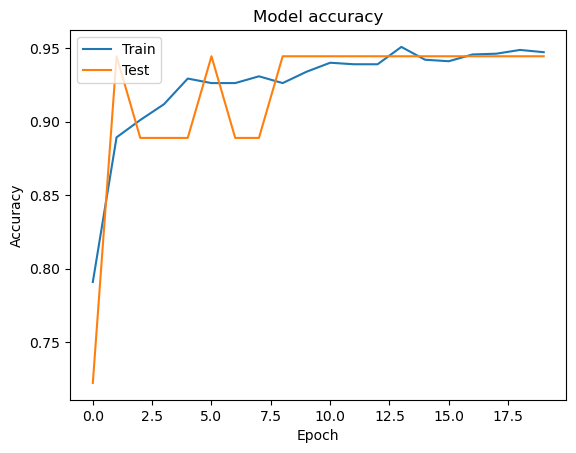

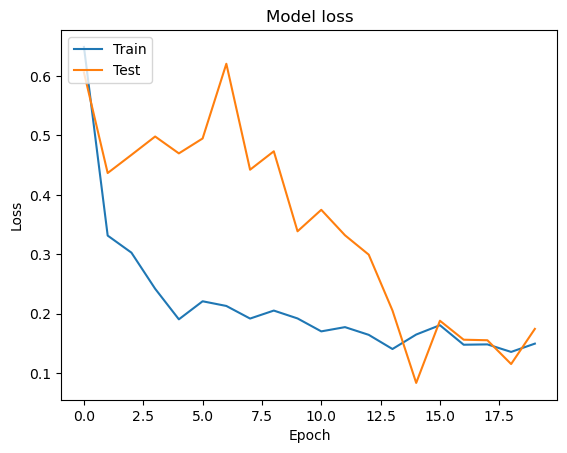

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [18]:
y_pred = model.predict(testdata)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step


array([[8.0239488e-07, 9.9994624e-01, 8.3907098e-06, 4.4557866e-05],
       [1.1161347e-04, 1.0455279e-08, 9.9988830e-01, 8.5215625e-08],
       [2.8156352e-05, 2.2165922e-03, 2.9664693e-04, 9.9745864e-01],
       [5.1980367e-04, 9.5062900e-01, 4.4370627e-05, 4.8806909e-02],
       [8.5662401e-07, 9.9996722e-01, 1.7474743e-08, 3.1978980e-05],
       [3.4700791e-04, 4.9110664e-08, 9.9965262e-01, 3.2982305e-07],
       [3.5009132e-06, 9.9999225e-01, 5.6824721e-08, 4.1477815e-06],
       [3.2060852e-06, 7.2256898e-09, 9.9980301e-01, 1.9373257e-04],
       [8.0392580e-04, 5.4210321e-09, 9.9919182e-01, 4.2758743e-06],
       [5.9257235e-07, 4.4243515e-04, 1.2328532e-04, 9.9943358e-01],
       [2.6496818e-07, 9.9999964e-01, 1.8887212e-08, 1.6046937e-07],
       [3.5743230e-07, 6.0849721e-03, 2.6818043e-07, 9.9391443e-01],
       [4.7946963e-04, 1.7987338e-09, 9.9951744e-01, 3.1032434e-06],
       [2.5377467e-08, 9.9989951e-01, 7.7451887e-08, 1.0041767e-04],
       [9.9998832e-01, 1.4222519e-

In [19]:
final_pred = np.argmax(y_pred, axis=1)
final_pred

array([1, 2, 3, 1, 1, 2, 1, 2, 2, 3, 1, 3, 2, 1, 0, 3, 0, 0], dtype=int64)

In [20]:
model.save('Densenet121.h5')